In [ ]:
%matplotlib inline


# PDP for categorical data


In [1]:

from ai4water import Model
from ai4water.datasets import mg_photodegradation
from ai4water.postprocessing.explain import PartialDependencePlot

D:\C\Anaconda3\envs\tfcpu27_py39\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
D:\C\Anaconda3\envs\tfcpu27_py39\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
D:\C\Anaconda3\envs\tfcpu27_py39\lib\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"
D:\C\Anaconda3\envs\tfcpu27_py39\lib\site-packages\sklearn\experimental\enable_hist_gradient_boosting.py:16: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


In [2]:
data, cat_enc, an_enc = mg_photodegradation(encoding="ohe")


In [3]:
model = Model(model="XGBRegressor", verbosity=0)

In [5]:
rgr = model.fit(data=data)

In [6]:
x, _ = model.training_data(data=data)

In [7]:
pdp = PartialDependencePlot(model.predict, x, model.input_features,
                            num_points=14, save=False)

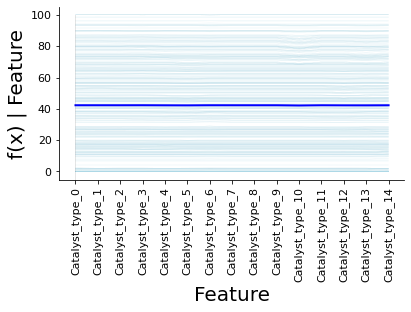

<Axes:xlabel='Feature', ylabel='f(x) | Feature'>

In [8]:
feature = [f for f in model.input_features if f.startswith('Catalyst_type')]
pdp.plot_1d(feature)

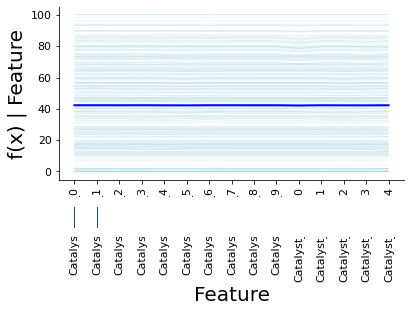

<Axes:xlabel='Feature', ylabel='f(x) | Feature'>

In [9]:
pdp.plot_1d(feature, show_dist_as="grid")

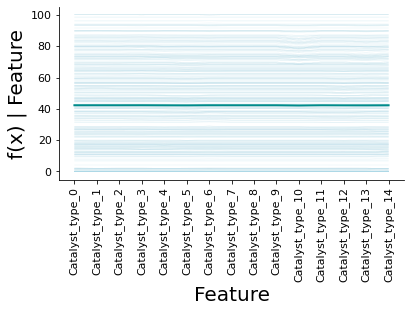

In [16]:
_ = pdp.plot_1d(feature, show_dist=False, pdp_line_kws={'color': 'darkcyan'})

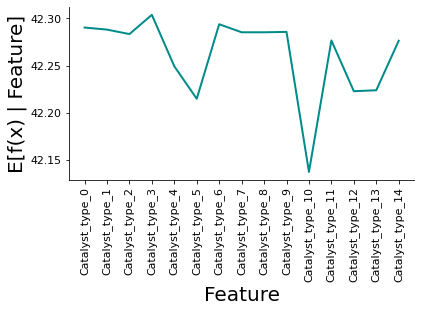

In [17]:
_ = pdp.plot_1d(feature, show_dist=False, ice=False, pdp_line_kws={'color': 'darkcyan'})

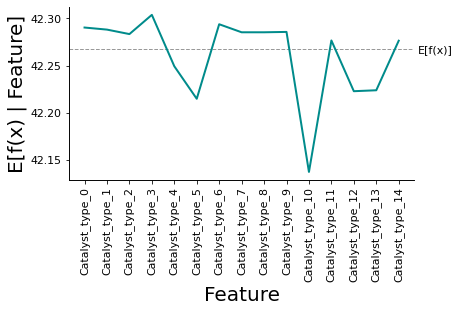

In [18]:
_ = pdp.plot_1d(feature, show_dist=False, ice=False, model_expected_value=True,
           pdp_line_kws={'color': 'darkcyan'})

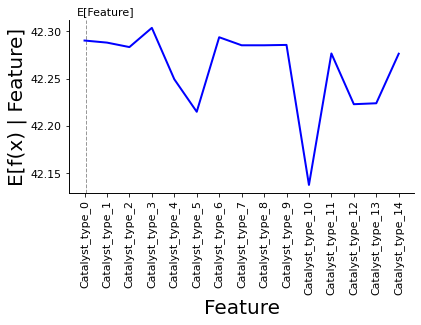

<Axes:xlabel='Feature', ylabel='E[f(x) | Feature]'>

In [13]:
pdp.plot_1d(feature, show_dist=False, ice=False, feature_expected_value=True,
           pdp_line_kws={'color': 'darkcyan'})

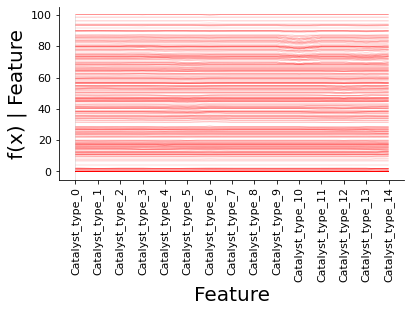

<Axes:xlabel='Feature', ylabel='f(x) | Feature'>

In [14]:
pdp.plot_1d(feature, ice_only=True, ice_color="red")

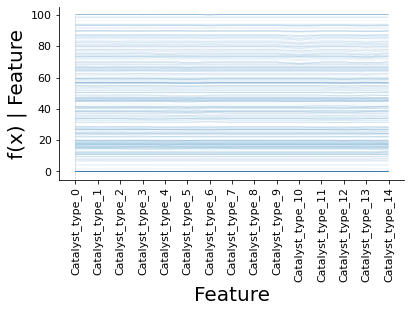

<Axes:xlabel='Feature', ylabel='f(x) | Feature'>

In [15]:
pdp.plot_1d(feature, ice_only=True, ice_color="Blues")